In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
rent_df=pd.read_csv("data/Rent_Data.csv")
rent_df.columns = ["Year", "Quarter", "LGA", "Dwelling Type", "Bedroom Number", 
                "First QNB", "Second QNB", "Third QNB", "NB Lodged", "TB Lodged", "Qtrly Median Change", 
                "Annly Median Change", "Qtrly NB", "Annly NB"]
rent_df.head(10)

,Year,Quarter,LGA,Dwelling Type,Bedroom Number,First QNB,Second QNB,Third QNB,NB Lodged,TB Lodged,Qtrly Median Change,Annly Median Change,Qtrly NB,Annly NB
0,2019,2,Albury,Total,Total,220,275,340,623.00,6095.00,-5.17%,1.85%,-16.93%,-5.03%
1,2019,2,Albury,Total,Bedsitter,-,-,-,-,-,-,-,-,-
2,2019,2,Albury,Total,1 Bedroom,165,178,200,50.00,496.00,1.43%,4.41%,-12.28%,11.11%
3,2019,2,Albury,Total,Not Specified,-,-,-,-,214.00,-,-,-,-
4,2019,2,Albury,Total,2 Bedrooms,190,235,265,255.00,2341.00,0.00%,2.17%,-5.56%,0.00%
5,2019,2,Albury,Total,3 Bedrooms,280,310,348,227.00,2141.00,-3.12%,6.90%,-22.53%,-9.56%
6,2019,2,Albury,Total,4 or more Bedrooms,360,400,430,83.00,893.00,0.00%,2.56%,-29.66%,-16.16%
7,2019,2,Albury,House,Total,275,320,370,312.00,2909.00,-3.03%,3.23%,-22.96%,-11.11%
8,2019,2,Albury,House,Bedsitter,-,-,-,-,-,-,-,-,-
9,2019,2,Albury,House,1 Bedroom,-,-,-,-,s,-,-,-,-


In [3]:
%run scripts/Rent_ntbk_util.py

Iteration 1, loss = 134.82671874
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 20.45664048
Iteration 5, loss = 6.86626479
Iteration 6, loss = 2.83951366
Iteration 7, loss = 2.84981305
Iteration 8, loss = 2.85736337
Iteration 9, loss = 2.86248323
Iteration 10, loss = 2.86576958
Iteration 11, loss = 2.86734495
Iteration 12, loss = 2.86659652
Iteration 13, loss = 2.86647471
Iteration 14, loss = 2.86466929
Iteration 15, loss = 2.86205153
Iteration 16, loss = 2.85892640
Iteration 17, loss = 2.85575524
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


#### Data Cleaning
* replaced "-" with NaN
* convert numberical columns into float
* get the minimum non 0 value of __First QNB, Second QNB, and Third QNB__
* for replace NaN values with 0, for rows with 9 columns with NaN values, this means that the row is totally empty/blank
* replace the rest of NaN in __First QNB, Second QNB, and Third QNB__ with minimum value of column minus 1, to distinguish cells that have NaN value that is not an empty row. And for these cells to have values closer to the minimum but is less than the minimum value 

* __NB Lodged and TB Lodged__ - replaced NaN with 0 and s with minim value of column divided by 2. Due to s means really small value
* remove "%" in __Qtrly Median Change, Annly Median Change, Qtrly NB, Annly NB__
* convert numerical columns to int except for __Qtrly Median Change, Annly Median Change, Qtrly NB, Annly NB__
* add __Mean QNB__ column, which is the average of First QNB, Second QNB, and Third QNB.

In [4]:
rent_df.head(10)

,Year,Quarter,LGA,Dwelling Type,Bedroom Number,First QNB,Second QNB,Third QNB,NB Lodged,TB Lodged,Qtrly Median Change,Annly Median Change,Qtrly NB,Annly NB,Mean QNB
0,2019,2,Albury,Total,Total,220,275,340,311,3047,5.0,1.0,16.0,5.0,278
1,2019,2,Albury,Total,Bedsitter,0,0,0,0,0,0.0,0.0,0.0,0.0,0
2,2019,2,Albury,Total,1 Bedroom,165,178,200,25,248,1.0,4.0,12.0,11.0,181
3,2019,2,Albury,Total,Not Specified,59,59,59,0,107,0.0,0.0,0.0,0.0,59
4,2019,2,Albury,Total,2 Bedrooms,190,235,265,127,1170,0.0,2.0,5.0,0.0,230
5,2019,2,Albury,Total,3 Bedrooms,280,310,348,113,1070,3.0,6.0,22.0,9.0,312
6,2019,2,Albury,Total,4 or more Bedrooms,360,400,430,41,446,0.0,2.0,29.0,16.0,396
7,2019,2,Albury,House,Total,275,320,370,156,1454,3.0,3.0,22.0,11.0,321
8,2019,2,Albury,House,Bedsitter,0,0,0,0,0,0.0,0.0,0.0,0.0,0
9,2019,2,Albury,House,1 Bedroom,59,59,59,0,0,0.0,0.0,0.0,0.0,59


#### Top LGAs with highest Rent price
* new DataFrame was created to show the behaviour of the Renting Price per Quarter of the TOP LGA
* LGAs were ranked based on the Renting Price, and the top 10 LGAs were graphed to show the increase and decrese in Renting Price per quarter
* in the new DataFrame __all_mean_df__ 2015.Q1 to 2017.Q2 columns were dropped due to it's big difference with 2017.Q3 to 2019.Q2 data.

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

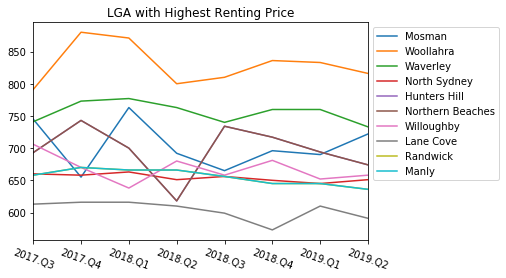

In [5]:
plt.figure(figsize=(15,10)) 
top_mean_df.transpose().plot()
plt.title('LGA with Highest Renting Price')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

#### Get all LGAs and Mean QNB per Quarter
* new DataFrame was created to show the behaviour of the Renting Price per Quarter for each LGA
* new DataFrame will be used for Training and Testing of data, since the goal of this project is to predict the Renting Price of each LGA for the next quarter. 

In [6]:
all_mean_df.head(10)

,LGA,2017.Q3,2017.Q4,2018.Q1,2018.Q2,2018.Q3,2018.Q4,2019.Q1,2019.Q2
LGA,,,,,,,,,
Albury,Albury,268,280,283,273,280,280,291,278
Armidale Regional,Armidale Regional,268,280,283,273,280,280,291,278
Ballina,Ballina,268,280,283,273,280,280,291,278
Balranald,Balranald,268,280,283,273,280,280,291,278
Bathurst Regional,Bathurst Regional,268,280,283,273,280,280,291,278
Bega Valley,Bega Valley,268,280,283,273,280,280,291,278
Bellingen,Bellingen,268,280,283,273,280,280,291,278
Berrigan,Berrigan,268,280,283,273,280,280,291,278
Bland,Bland,268,280,283,273,280,280,291,278


#### Get correlation of all LGAs and Year/Quarter prices
* using the new DataFrame __all_mean_df__, the correlation of each column is high

In [7]:
%run scripts/PearsonValue.py

<Figure size 432x288 with 0 Axes>

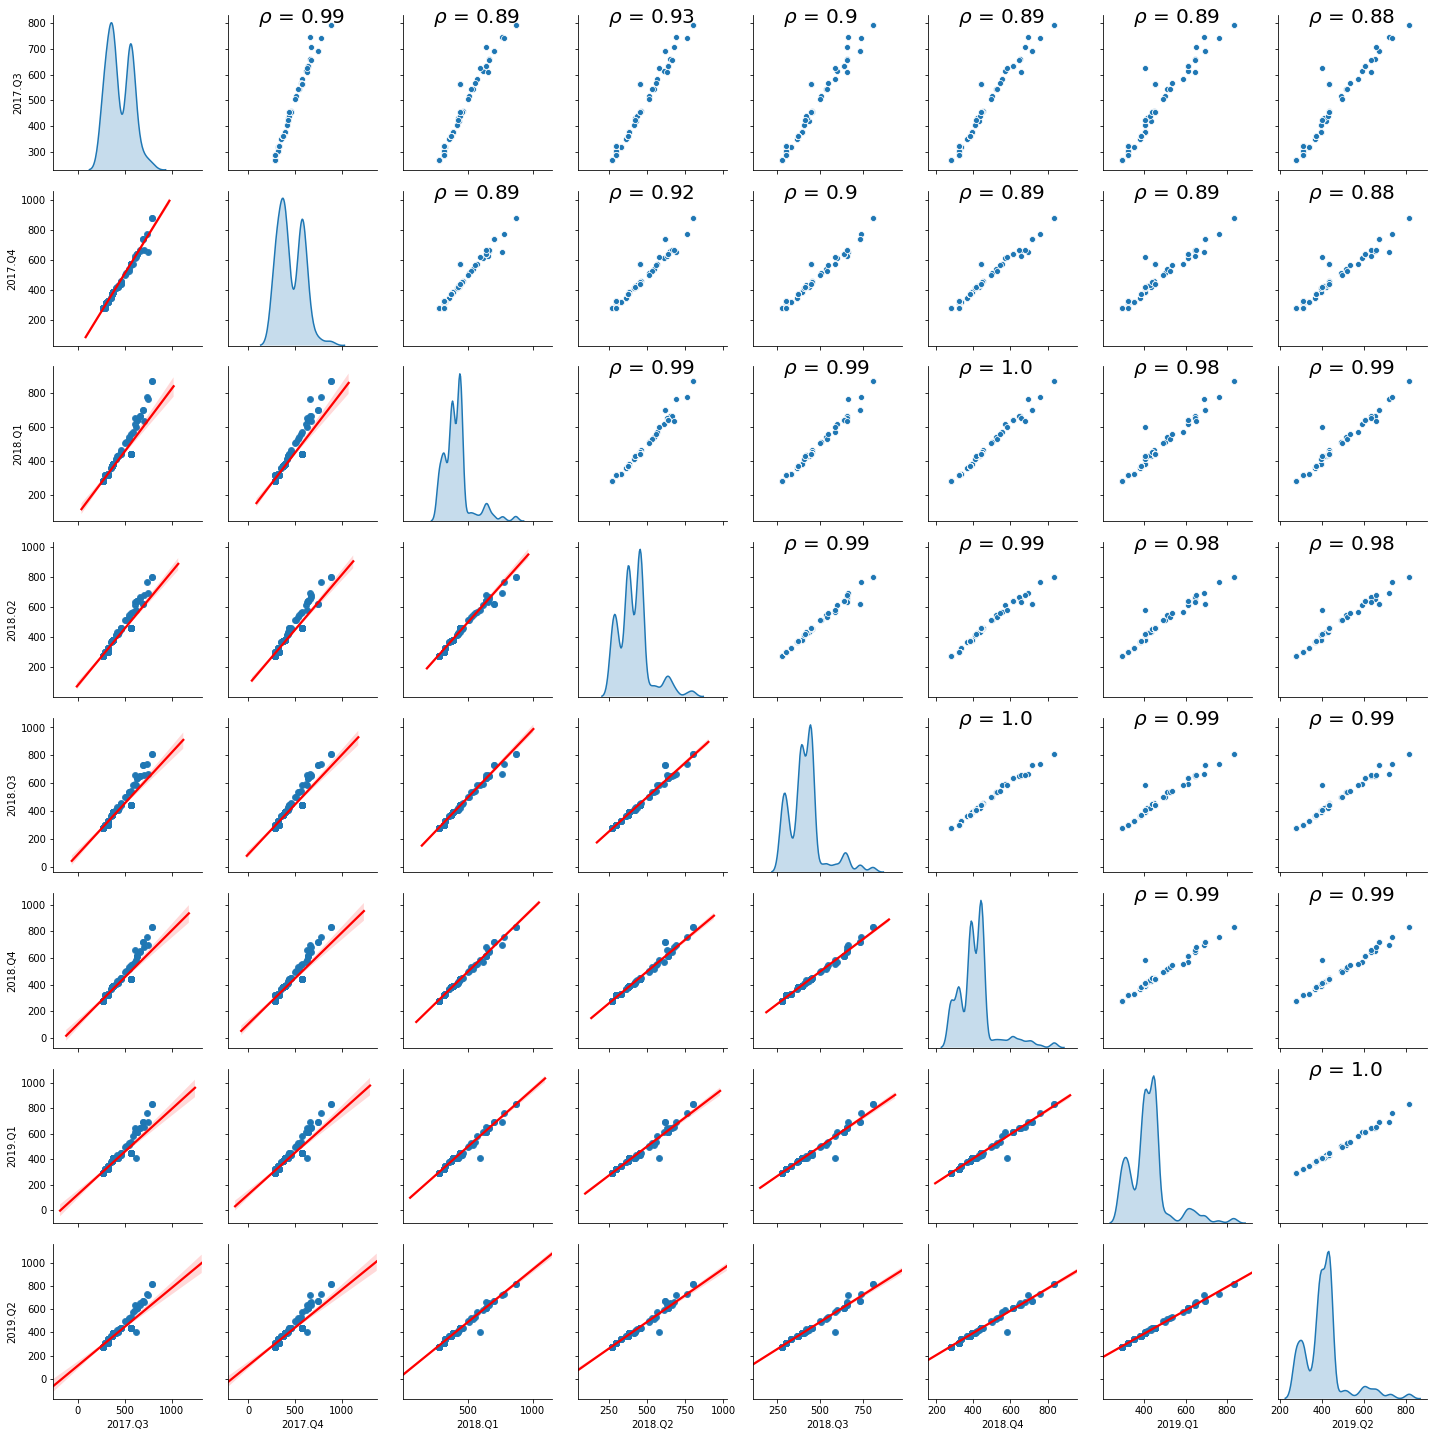

In [8]:
g = sns.pairplot(all_mean_df,
             vars = ['2017.Q3', '2017.Q4', '2018.Q1', '2018.Q2', '2018.Q3', '2018.Q4',
                      '2019.Q1', '2019.Q2'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

#### Apply Models and see accruacy score
* Decision Tree
* __Random Forest__ -  gives the best score out of all the models used
* SVM
* __Neural Network__ - give the worst score out of all the models

##### Basis of a Good Model
* __Root Mean Sqaured Error__ the lower the error value (absolute value) the better the model
* __R-Sqaured__ the higher the value (absolute value) the better the model
* __Accuracy Score__ should be closer to 1.00

##### Analysis
* As seen in the table and plots, __Random Forest__ gives the best results. It's RMSE for both train and test data are the smallest, it has better R-Squared value for testing data compared to Decision Tree, has better Accuracy Score of test data, and both R-Squared and Accuracy Score for training data are high and close to 1.00.

In [9]:
stats_df

,RMSE Train,RMSE Test,R-Squared Train,R-Squared Test,Accuracy Score Train,Accuracy Score Test
Model,,,,,,
Decision Tree,0.000000,129.763636,1.000000,0.984338,1.000000,0.818182
Random Forest,44.967031,94.096364,0.995592,0.988643,0.995592,0.988643
SVM,267.359375,751.436364,0.973792,0.909306,0.843750,0.636364
Neural Network,10878.742188,8734.054545,-0.066384,-0.054152,0.343750,0.254545


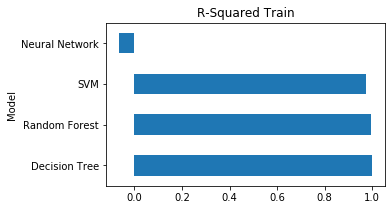

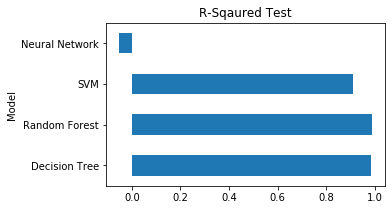

In [10]:
plt.figure(figsize=(5,3))
stats_df['R-Squared Train'].plot(kind = 'barh', 
           title='R-Squared Train', 
           legend = False)

plt.figure(figsize=(5,3))
stats_df['R-Squared Test'].plot(kind = 'barh', 
           title='R-Sqaured Test', 
           legend = False)

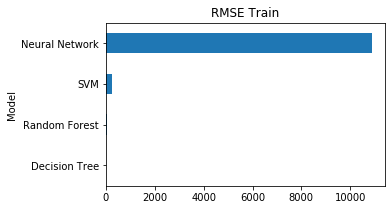

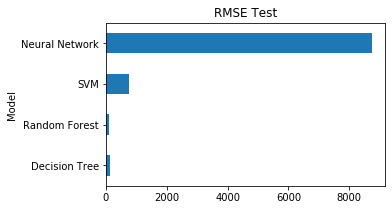

In [11]:
plt.figure(figsize=(5,3))
stats_df['RMSE Train'].plot(kind = 'barh', 
           title='RMSE Train', 
           legend = False)

plt.figure(figsize=(5,3))
stats_df['RMSE Test'].plot(kind = 'barh', 
           title='RMSE Test', 
           legend = False)

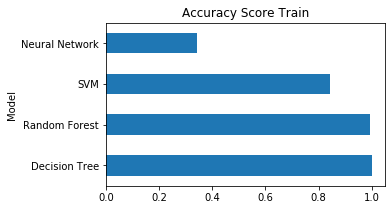

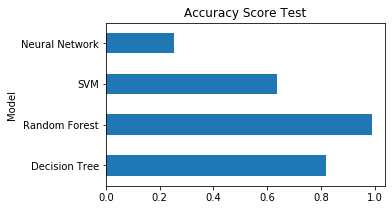

In [12]:
plt.figure(figsize=(5,3))
stats_df['Accuracy Score Train'].plot(kind = 'barh', 
           title='Accuracy Score Train', 
           legend = False)

plt.figure(figsize=(5,3))
stats_df['Accuracy Score Test'].plot(kind = 'barh', 
           title='Accuracy Score Test', 
           legend = False)

#### Top LGAs according to New Signed Bonds
* LGAs with the highest New Bond Lodged were graphed as well as the LGAs' Renting Price to show the behaviour of both graphs.
* the correlation of New Bond Lodged and Renting Price was also also graphed

##### Analysis
* with the illustrated graph and value of correlation between Renting Price and New Bond Lodged, it is seen that Renting Price doesn't greatly affect the number Bond Lodged. The number of Bond Lodged maybe affected by the other factors that are not included in this dataset.

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

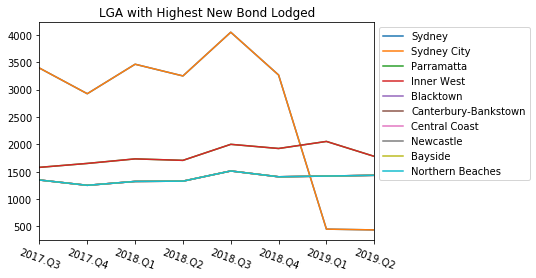

<Figure size 1080x720 with 0 Axes>

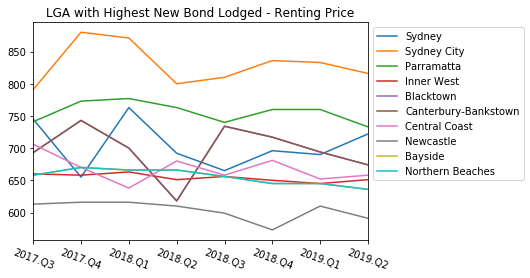

In [13]:
## plot New Bond Lodged
plt.figure(figsize=(15,10)) 
top_NB_df.transpose().plot()
plt.title('LGA with Highest New Bond Lodged')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

## Renting Price Mean of New Bond Lodge LGAs
plt.figure(figsize=(15,10))
top_nbmean_df.transpose().plot()
plt.title('LGA with Highest New Bond Lodged - Renting Price')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

In [14]:
top_NB_df

,2017.Q3,2017.Q4,2018.Q1,2018.Q2,2018.Q3,2018.Q4,2019.Q1,2019.Q2
LGA,,,,,,,,
Sydney,3394,2925,3464,3250,4049,3267,450,436
Sydney City,3394,2925,3464,3250,4049,3267,450,436
Parramatta,1579,1651,1734,1707,2000,1924,2053,1780
Inner West,1579,1651,1734,1707,2000,1924,2053,1780
Blacktown,1348,1251,1322,1327,1513,1407,1420,1434
Canterbury-Bankstown,1348,1251,1322,1327,1513,1407,1420,1434
Central Coast,1348,1251,1322,1327,1513,1407,1420,1434
Newcastle,1348,1251,1322,1327,1513,1407,1420,1434
Bayside,1348,1251,1322,1327,1513,1407,1420,1434


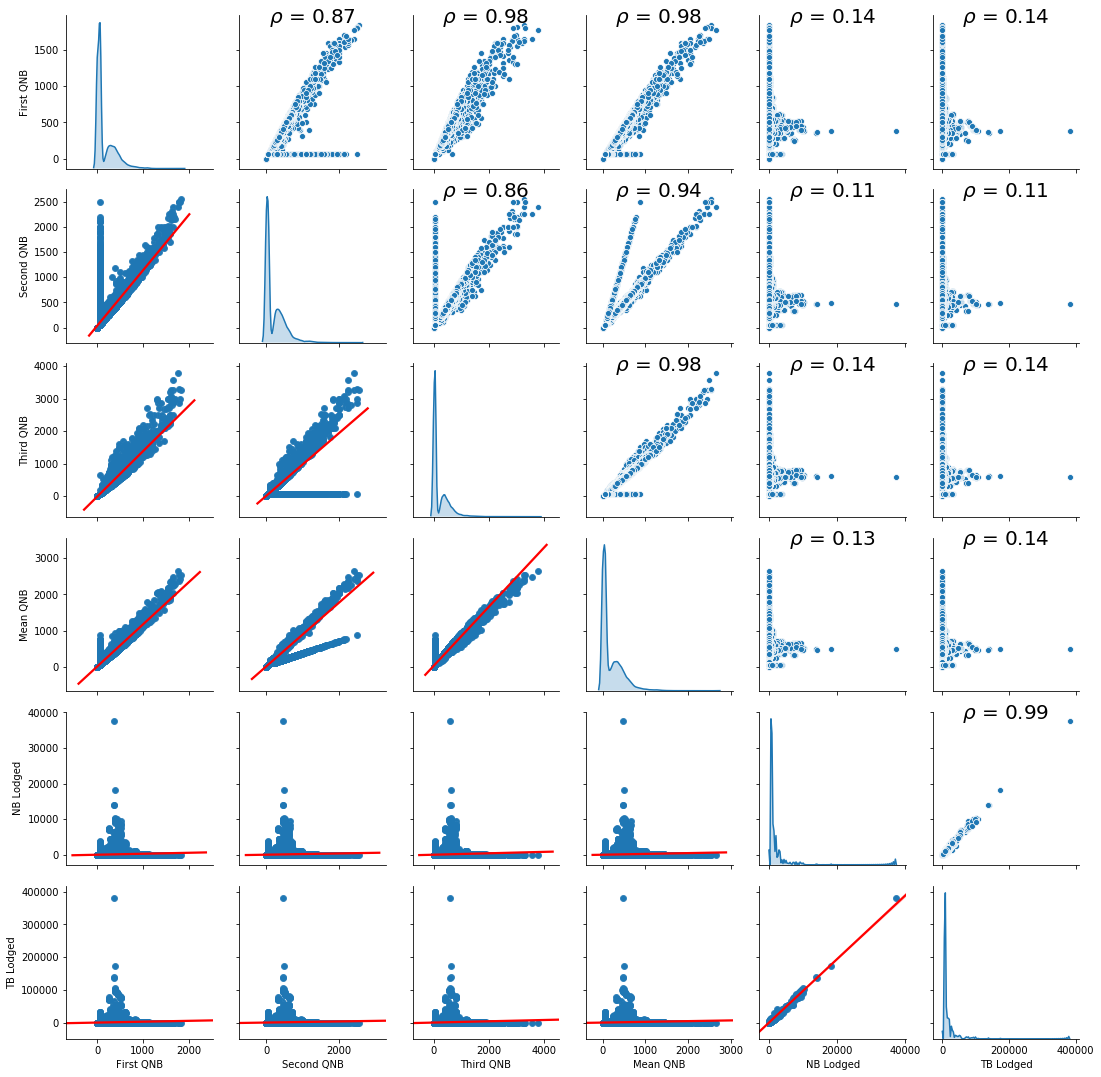

In [15]:
g = sns.pairplot(rent_df,
             vars = ['First QNB', 'Second QNB', 'Third QNB', 'Mean QNB', 'NB Lodged', 'TB Lodged'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

#### Dwelling Type Most People Rent
* most people rent Flat/Unit compared to other Dwelling Types
* most people prefer 2 Bedroom Flat/Unit, which can be seen in the graph

Text(0.5, 1.0, 'Total Bond Lodged per Year')

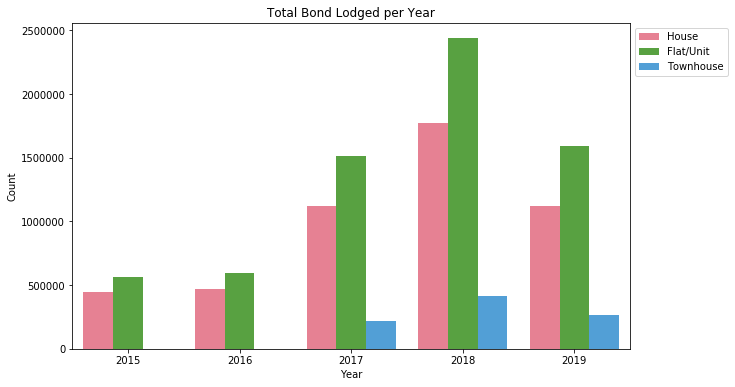

In [16]:
## Total Bond Lodged per year per dwelling type
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'Year', 
            y = 'Count', 
            data = bond_count_df, 
            hue = 'Dwelling Type', 
            palette = 'husl',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Total Bond Lodged per Year')

Text(0.5, 1.0, 'Bond Lodged per Year')

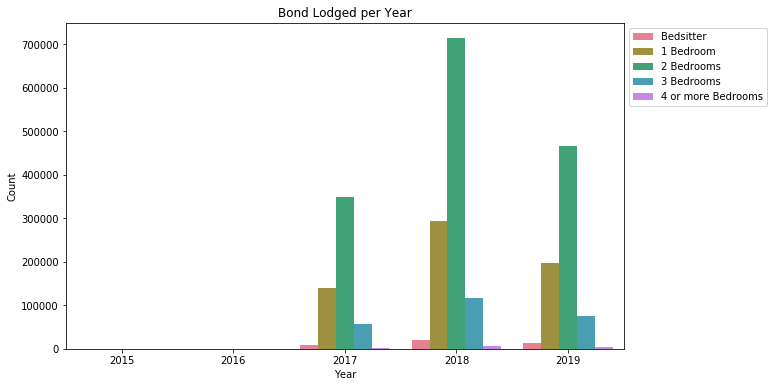

In [17]:
## FLAT/UNIT: plot total bond lodged per year per number of bedroom
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'Year', 
            y = 'Count', 
            data = flatbond_count_df, 
            hue = 'Number of Bedrooms', 
            palette = 'husl',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Bond Lodged per Year')

#### Apply Models and see accuracy score for rent_df
* Decision Tree
* Random Forest
* SVM
* Neural Network

##### Details
* columns used in the first train test data are the columns with the highest correlation value with __Mean QNB__ column which is the predicted column.
* columns used in the second train test data are the top 7 featured selected columns using _ExtraTreesClassifier_
* the results of the two train test data were compared, to see if it gives the same results eventhough different columns were used for the prediction

##### Analysis
* for the rent_df dataframe, RandomForest still gives the best results for both datasets. Both having the smallest value of RMSE, better R-Sqaured value next to Decision Tree, and highest accuracy score.

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(rent_df['LGA'].unique())
rent_df['LGA']=le.transform(rent_df['LGA']) 

le.fit(rent_df['Dwelling Type'].unique())
rent_df['Dwelling Type']=le.transform(rent_df['Dwelling Type']) 

le.fit(['Total', 'Bedsitter', '1 Bedroom', '2 Bedrooms', '3 Bedrooms', '4 or more Bedrooms', 'Not Specified'])
rent_df['Bedroom Number']=le.transform(rent_df['Bedroom Number']) 

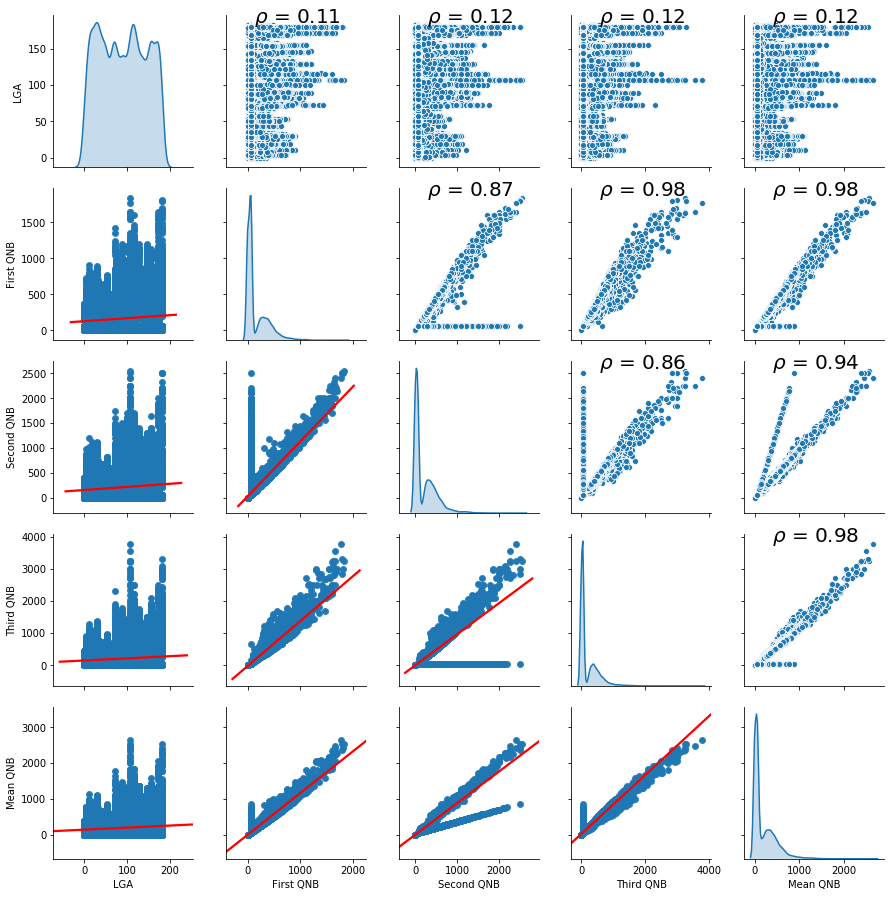

In [19]:
g = sns.pairplot(rent_df,
             vars = ['LGA', 'First QNB', 'Second QNB', 'Third QNB', 'Mean QNB'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

cols = np.array(['LGA', 'First QNB', 'Second QNB', 'Third QNB'])
X = rent_df[cols]
y = rent_df['Mean QNB']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [27]:
model_list = [DecisionTreeClassifier(random_state=0),
              RandomForestRegressor(random_state=1),
              svm.SVC(gamma='scale'),
              MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=20, alpha=0.01, 
                            solver='sgd', verbose=10,  random_state=21,tol=0.000000001)]
model_name = ['Decision Tree', 'Random Forest', 'SVM', 'Neural Network']

stats = []

for x in range(4):
    model = model_list[x]
    model.fit(X_train, y_train)
    predicted = model.predict(X_train)
    MSE_train = mean_squared_error(y_train, predicted)
    R2_train = r2_score(y_train, predicted)
    Accuracy_train = model.score(X_train, y_train)
    predicted = model.predict(X_test)
    MSE_test = mean_squared_error(y_test, predicted)
    R2_test = r2_score(y_test, predicted)
    Accuracy_test = model.score(X_test, y_test)
    model = model_name[x]
    stats.append((model, MSE_train, MSE_test, R2_train, R2_test, Accuracy_train, Accuracy_test))
    stats_df = pd.DataFrame.from_records(stats)
    stats_df.columns = ['Model', 'RMSE Train', 'RMSE Test', 'R-Squared Train', 'R-Squared Test', 
                        'Accuracy Score Train', 'Accuracy Score Test']
    stats_df.index = stats_df['Model']
    stats_df = stats_df.drop('Model',
                axis = 1)

stats_df

Iteration 1, loss = 3.96704670
Iteration 2, loss = 3.24068672
Iteration 3, loss = 3.13592825
Iteration 4, loss = 3.07277706
Iteration 5, loss = 3.02542699
Iteration 6, loss = 2.95841420
Iteration 7, loss = 2.90933126
Iteration 8, loss = 2.85642807
Iteration 9, loss = 2.81531150
Iteration 10, loss = 2.78995777
Iteration 11, loss = 2.75493521
Iteration 12, loss = 2.73969511
Iteration 13, loss = 2.72074660
Iteration 14, loss = 2.71919102
Iteration 15, loss = 2.68670556
Iteration 16, loss = 2.67580111
Iteration 17, loss = 2.66443433
Iteration 18, loss = 2.65142536
Iteration 19, loss = 2.63888777
Iteration 20, loss = 2.62423742


,RMSE Train,RMSE Test,R-Squared Train,R-Squared Test,Accuracy Score Train,Accuracy Score Test
Model,,,,,,
Decision Tree,0.000000,68.924068,1.000000,0.998920,1.000000,0.768748
Random Forest,3.467140,17.851282,0.999946,0.999720,0.999946,0.999720
SVM,159.329272,162.072320,0.997517,0.997460,0.598337,0.600000
Neural Network,28191.373561,28720.521790,0.560640,0.549856,0.575385,0.580997


Text(0.5, 0, 'Importance')

<Figure size 720x432 with 0 Axes>

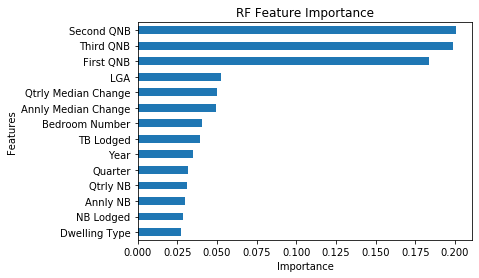

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)
all_cols = ["Year", "Quarter", "LGA", "Dwelling Type", "Bedroom Number", 
                "First QNB", "Second QNB", "Third QNB", "NB Lodged", "TB Lodged", "Qtrly Median Change", 
                "Annly Median Change", "Qtrly NB", "Annly NB"]
X = rent_df[all_cols]
y = rent_df['Mean QNB']

forest.fit(X, y)
importances = forest.feature_importances_
RF_data = {'Features': all_cols, 'Importance': importances}
RF_df = pd.DataFrame(RF_data)
RF_df = RF_df.sort_values(by = ['Importance'])

plt.figure(figsize=(10,6))
RF_df.plot(kind = 'barh', 
           x = 'Features', 
           y = 'Importance', 
           title='RF Feature Importance', 
           legend = False)
plt.xlabel('Importance')

In [33]:
from sklearn.model_selection import train_test_split

cols = np.array(['LGA', 'First QNB', 'Second QNB', 'Third QNB', 'Qtrly Median Change', 'Annly Median Change', 'Bedroom Number'])
X = rent_df[cols]
y = rent_df['Mean QNB']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [35]:
model_list = [DecisionTreeClassifier(random_state=0),
              RandomForestRegressor(random_state=1),
              svm.SVC(gamma='scale'),
              MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=20, alpha=0.01, 
                            solver='sgd', verbose=10,  random_state=21,tol=0.000000001)]
model_name = ['Decision Tree', 'Random Forest', 'SVM', 'Neural Network']

stats = []

for x in range(4):
    model = model_list[x]
    model.fit(X_train, y_train)
    predicted = model.predict(X_train)
    MSE_train = mean_squared_error(y_train, predicted)
    R2_train = r2_score(y_train, predicted)
    Accuracy_train = model.score(X_train, y_train)
    predicted = model.predict(X_test)
    MSE_test = mean_squared_error(y_test, predicted)
    R2_test = r2_score(y_test, predicted)
    Accuracy_test = model.score(X_test, y_test)
    model = model_name[x]
    stats.append((model, MSE_train, MSE_test, R2_train, R2_test, Accuracy_train, Accuracy_test))
    stats_df = pd.DataFrame.from_records(stats)
    stats_df.columns = ['Model', 'RMSE Train', 'RMSE Test', 'R-Squared Train', 'R-Squared Test', 
                        'Accuracy Score Train', 'Accuracy Score Test']
    stats_df.index = stats_df['Model']
    stats_df = stats_df.drop('Model',
                axis = 1)

stats_df

Iteration 1, loss = 4.10732594
Iteration 2, loss = 3.18062905
Iteration 3, loss = 3.07283666
Iteration 4, loss = 3.02309528
Iteration 5, loss = 2.97187437
Iteration 6, loss = 2.93756831
Iteration 7, loss = 2.89095719
Iteration 8, loss = 2.85023138
Iteration 9, loss = 2.81086460
Iteration 10, loss = 2.77059307
Iteration 11, loss = 2.74080693
Iteration 12, loss = 2.71798074
Iteration 13, loss = 2.69678149
Iteration 14, loss = 2.67283293
Iteration 15, loss = 2.65820026
Iteration 16, loss = 2.64232019
Iteration 17, loss = 2.62819188
Iteration 18, loss = 2.62166041
Iteration 19, loss = 2.60672978
Iteration 20, loss = 2.59078050


,RMSE Train,RMSE Test,R-Squared Train,R-Squared Test,Accuracy Score Train,Accuracy Score Test
Model,,,,,,
Decision Tree,0.000000,91.677896,1.000000,0.998563,1.000000,0.744170
Random Forest,4.771517,19.900395,0.999926,0.999688,0.999926,0.999688
SVM,209.133035,210.140400,0.996741,0.996706,0.594333,0.596545
Neural Network,26714.981860,26970.958225,0.583649,0.577277,0.578582,0.584688


__SALES DATASET__

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

__Importing header files and dataset of Sale__

In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

__Reading dataset__

In [395]:
df = pd.read_csv("Sales_Data.csv")

__Dataset contain 2 categorical variable and 11 Numerical variable__

In [396]:
df.head()

,Year,Quarter,Local Government Areas (LGAs),DwellingType,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,2018.0,4.0,Total,Total,290.00,400.00,550.00,443.00,7916.00,-0.02,0.00,0.00,-0.20
1,2018.0,4.0,Total,Non Strata,294.00,411.00,560.00,452.00,6801.00,-0.02,-0.02,0.01,-0.20
2,2018.0,4.0,Total,Strata,275.00,355.00,465.00,388.00,1115.00,-0.02,0.01,-0.01,-0.22
3,2018.0,4.0,Albury,Total,240.00,308.00,420.00,345.00,258.00,0.04,-0.04,0.09,-0.19
4,2018.0,4.0,Albury,Non Strata,275.00,360.00,443.00,377.00,211.00,0.06,0.08,0.15,-0.18


__Replacing - and s values with nan so that we can count the number of null values__

In [397]:
df = df.replace("-", np.nan)
df=df.replace("s",np.nan)

__Number of null values__

In [398]:
df.isnull().sum()

Year                                     0
Quarter                                  0
Local Government Areas (LGAs)            2
DwellingType                             5
First Quartile Sales Price\n$'000s     608
Median Sales Price\n$'000s             608
Third Quartile Sales Price\n'000s      608
Mean Sales Price\n$'000s               608
Sales\nNo.                            3237
Qtly change in Median                  613
Annual change in Median                617
Qtly change in Count                  2810
Annual change in Count                2810
dtype: int64

__We have used backward fill method to fill null value__

In [399]:
df= df.fillna(method='bfill')

In [400]:
df.head()

,Year,Quarter,Local Government Areas (LGAs),DwellingType,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,2018.0,4.0,Total,Total,290.00,400.00,550.00,443.00,7916.00,-0.02,0.00,0.00,-0.20
1,2018.0,4.0,Total,Non Strata,294.00,411.00,560.00,452.00,6801.00,-0.02,-0.02,0.01,-0.20
2,2018.0,4.0,Total,Strata,275.00,355.00,465.00,388.00,1115.00,-0.02,0.01,-0.01,-0.22
3,2018.0,4.0,Albury,Total,240.00,308.00,420.00,345.00,258.00,0.04,-0.04,0.09,-0.19
4,2018.0,4.0,Albury,Non Strata,275.00,360.00,443.00,377.00,211.00,0.06,0.08,0.15,-0.18


In [401]:
df.columns

Index(['Year', 'Quarter', 'Local Government Areas (LGAs)', 'DwellingType',
       'First Quartile Sales Price\n$'000s', 'Median Sales Price\n$'000s',
       'Third Quartile Sales Price\n'000s', 'Mean Sales Price\n$'000s',
       'Sales\nNo.', 'Qtly change in Median', 'Annual change in Median',
       'Qtly change in Count', 'Annual change in Count'],
      dtype='object')

__Here the dataset contail value total which is useless hence we are dropping__

In [402]:
df.drop(df.loc[df['Local Government Areas (LGAs)']=='Total'].index, inplace=True)

In [403]:
df.drop(df[df['Local Government Areas (LGAs)'] =='Total'].index, inplace = True) 

In [404]:
df.drop(df[df['DwellingType'] =='Total'].index, inplace = True) 

__Here we have shown the type of dwelling__

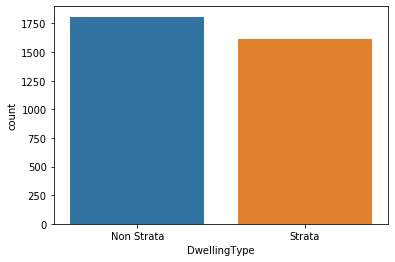

In [405]:
sns.countplot(x='DwellingType',data=df)

__It shows that the Non strata type of dwelling is slightly more in sales data in comparision to Strata__

In [408]:
%run scripts/Sales_Visualization.py

__Here we have drawn LGA with highest sales price__

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

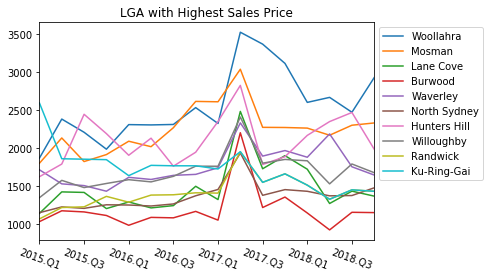

In [409]:
plt.figure(figsize=(15,10)) 
top_mean_df.transpose().plot()
plt.title('LGA with Highest Sales Price')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

__It shows that Woollahara has the highest sale price in year 2017 in quarter3__

__This graph Shows about LGA with maximum no of sales in different LGA__

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

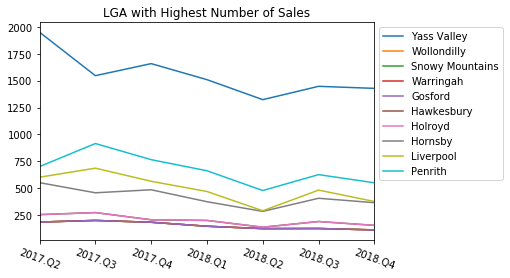

<Figure size 1080x720 with 0 Axes>

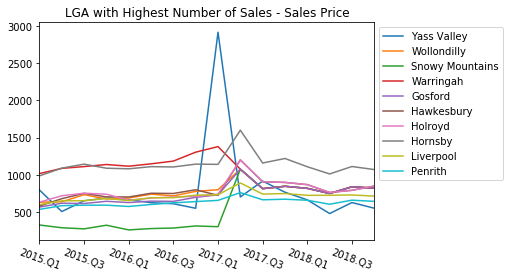

In [410]:
## plot New Bond Lodged
plt.figure(figsize=(15,10)) 
top_NB_df.transpose().plot()
plt.title('LGA with Highest Number of Sales')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

## Renting Price Mean of New Bond Lodge LGAs
plt.figure(figsize=(15,10))
top_nbmean_df.transpose().plot()
plt.title('LGA with Highest Number of Sales - Sales Price')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=-20)

__The upper graph shows that Yass Valley has the maximum number of sales for a long period of time in comparision to other__

__While the lower graph shows that Yass Valley show maximum sales in 2017 quater 1 and in quarter 3 of 2017 it has decrease as much as it increased__

In [411]:
top_NB_df

,2017.Q2,2017.Q3,2017.Q4,2018.Q1,2018.Q2,2018.Q3,2018.Q4
LGA,,,,,,,
Yass Valley,1950,1546,1658,1509,1323,1447,1428
Wollondilly,185,200,183,146,124,125,112
Snowy Mountains,185,200,183,146,124,125,112
Warringah,185,200,183,146,124,125,112
Gosford,185,200,183,146,124,125,112
Hawkesbury,254,273,206,200,137,190,154
Holroyd,254,273,206,200,137,190,154
Hornsby,551,457,485,374,284,406,365
Liverpool,602,686,564,469,290,482,376


In [412]:
%run scripts/PearsonValue.py

__This is correlation plot between different column which we have specified__

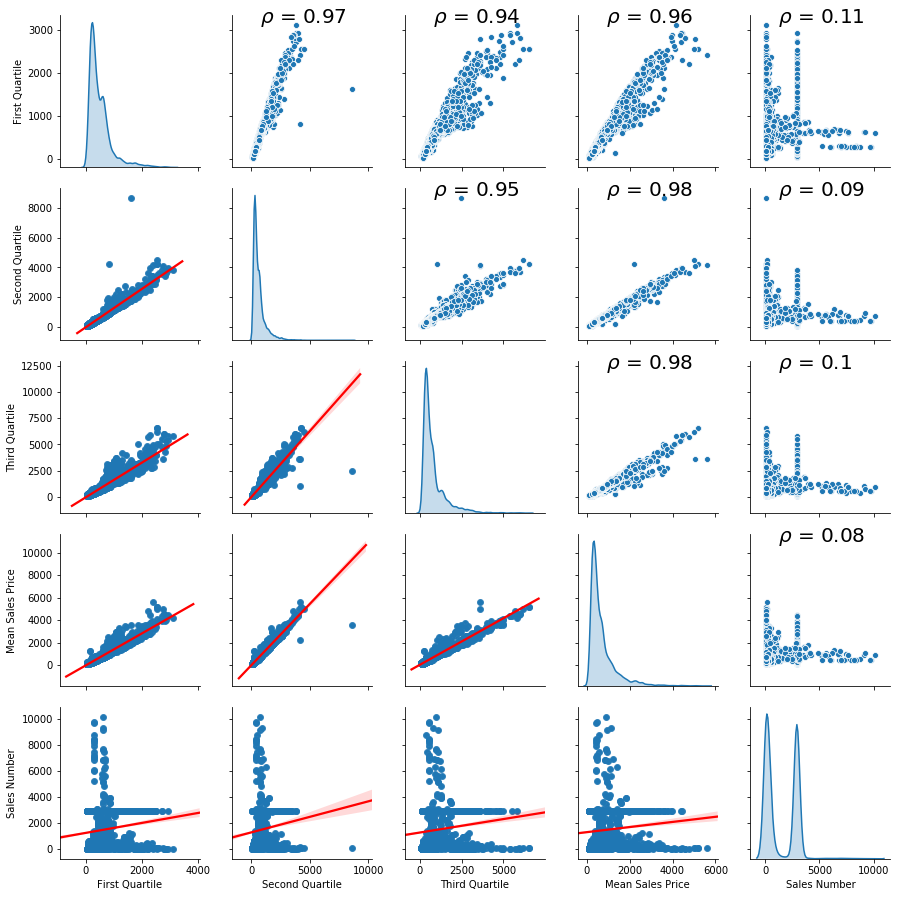

In [413]:
g = sns.pairplot(sales_df,
             vars = ['First Quartile', 'Second Quartile', 'Third Quartile', 'Mean Sales Price', 'Sales Number'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

__If the correlation value is close to 1 it means they are highly correlated while as the value reach close to 0 it means they are not related at all__

__This is a graph between Bond lodged vs Dwelling type__

Text(0.5, 1.0, 'Sales per Year')

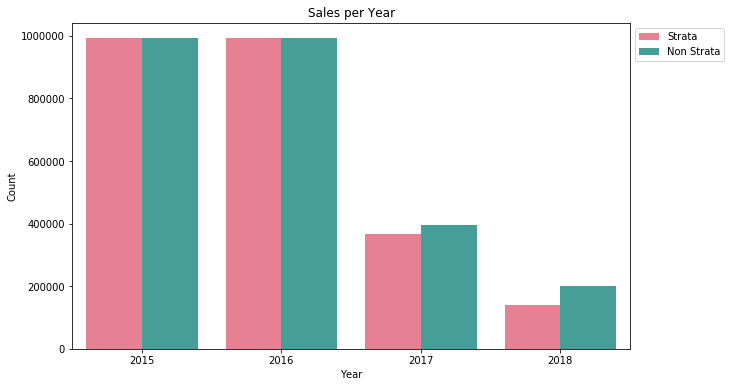

In [414]:
## Total Bond Lodged per year per dwelling type
plt.figure(figsize=(10,6)) 
 
sns.barplot(x = 'Year', 
            y = 'Count', 
            data = bond_count_df, 
            hue = 'Dwelling Type', 
            palette = 'husl',
            ci = None)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Sales per Year')

__It shows that every year the sales per year has been equal for both strata and non strata or non_Strata has slighlty high sales in comparison to strata__

In [217]:
df.head()

,Year,Quarter,Local Government Areas (LGAs),DwellingType,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
4,2018.0,4.0,Albury,Non Strata,275.00,360.00,443.00,377.00,211.00,0.06,0.08,0.15,-0.18
5,2018.0,4.0,Albury,Strata,160.00,212.00,230.00,199.00,47.00,0.03,-0.10,-0.13,-0.20
7,2018.0,4.0,Armidale Regional,Non Strata,290.00,355.00,461.00,388.00,116.00,0.04,0.03,0.61,0.05
8,2018.0,4.0,Armidale Regional,Strata,175.00,199.00,245.00,218.00,175.00,-0.22,-0.20,0.44,-0.28
10,2018.0,4.0,Ballina,Non Strata,545.00,660.00,848.00,726.00,115.00,-0.05,0.03,-0.08,-0.13


__Here we have created dummy variable of LGA to predict the sales of a particular LGA__

In [420]:
s=pd.get_dummies(df,columns=["Local Government Areas (LGAs)"])

In [421]:
s.head()

,Year,Quarter,DwellingType,First Quartile Sales Price $'000s,Median Sales Price $'000s,Third Quartile Sales Price '000s,Mean Sales Price $'000s,Sales No.,Qtly change in Median,Annual change in Median,...,Local Government Areas (LGAs)_Western Plains Regional,Local Government Areas (LGAs)_Willoughby,Local Government Areas (LGAs)_Wingecarribee,Local Government Areas (LGAs)_Wollondilly,Local Government Areas (LGAs)_Wollongong,Local Government Areas (LGAs)_Woollahra,Local Government Areas (LGAs)_Wyong,Local Government Areas (LGAs)_Yass Valley,Local Government Areas (LGAs)_uralla,Local Government Areas (LGAs)_walcha
4,2018.0,4.0,Non Strata,275.00,360.00,443.00,377.00,211.00,0.06,0.08,...,0,0,0,0,0,0,0,0,0,0
5,2018.0,4.0,Strata,160.00,212.00,230.00,199.00,47.00,0.03,-0.10,...,0,0,0,0,0,0,0,0,0,0
7,2018.0,4.0,Non Strata,290.00,355.00,461.00,388.00,116.00,0.04,0.03,...,0,0,0,0,0,0,0,0,0,0
8,2018.0,4.0,Strata,175.00,199.00,245.00,218.00,175.00,-0.22,-0.20,...,0,0,0,0,0,0,0,0,0,0
10,2018.0,4.0,Non Strata,545.00,660.00,848.00,726.00,115.00,-0.05,0.03,...,0,0,0,0,0,0,0,0,0,0


__It shows that there are 197 columns after using dummy variables__

In [422]:
s.columns

Index(['Year', 'Quarter', 'DwellingType', 'First Quartile Sales Price\n$'000s',
       'Median Sales Price\n$'000s', 'Third Quartile Sales Price\n'000s',
       'Mean Sales Price\n$'000s', 'Sales\nNo.', 'Qtly change in Median',
       'Annual change in Median',
       ...
       'Local Government Areas (LGAs)_Western Plains Regional',
       'Local Government Areas (LGAs)_Willoughby',
       'Local Government Areas (LGAs)_Wingecarribee',
       'Local Government Areas (LGAs)_Wollondilly',
       'Local Government Areas (LGAs)_Wollongong',
       'Local Government Areas (LGAs)_Woollahra',
       'Local Government Areas (LGAs)_Wyong',
       'Local Government Areas (LGAs)_Yass Valley',
       'Local Government Areas (LGAs)_uralla',
       'Local Government Areas (LGAs)_walcha'],
      dtype='object', length=197)

__Here we have dropped Dwelling type cause we already got things related to dwelling and now we want to predict LGA__

In [423]:
s = s.drop(["DwellingType"], axis=1)

__We have considered Wollahra area as our target variable__

In [424]:
Y=s['Local Government Areas (LGAs)_Woollahra']

__t is conisdered as our features to predict target variable__

In [ ]:
t=s.drop(['Local Government Areas (LGAs)_Woollahra'],axis=1)

__FIRST MODEL WE ARE USING IS DECISION TREE__

__it forces the consideration of all possible outcomes of a decision and traces each path to a conclusion__

In [425]:
X=t
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [426]:
y_pred_en=clf_entropy.predict(X_test)

In [427]:
print(y_pred_en)

[0 0 0 ... 0 0 0]


__It shows that this method is 99 percent accurate in predicting result that mean price given is from wollahra__

In [429]:
print("Accuracy is ",accuracy_score(y_test,y_pred_en)*100)

Accuracy is  99.0272373540856


In [231]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


__2 Method -RANDOM FOREST__

__Random forest runtimes are quite fast, and they are able to deal with unbalanced and missing data__

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
#X=s.values[:,4:13]
Y=s['Local Government Areas (LGAs)_Woollahra']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

__Mean absolute error is 0.008 which is very close to 0 hence the error is really less__

In [333]:
#X=s.values[:,4:13]
#Y=s['Local Government Areas (LGAs)_Woollahra']
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)


In [431]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


__3 METHOD - SUPPORT VECTOR CLASSIFIER__

__It works really well with clear margin of separation__

In [432]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))


C:\Users\61478\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:
0.9897959183673469


In [336]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9897959183673469


__Accuracy score of SVC is around 98 percent which is still 1 percent less than decision tree__

In [434]:
import pandas as pd
from sklearn.neural_network import MLPClassifier

In [435]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.30, random_state=27)

__Method 4 - NEURAL NETWORK__

__The input is stored in its own networks instead of a database, hence the loss of data does not affect its working.__

In [436]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=20, alpha=0.01,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(x_train, y_train)
y1_pred = clf.predict(x_test)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 157.81515929
Iteration 4, loss = 242.36157854
Iteration 5, loss = 270.92011431
Iteration 6, loss = inf
Iteration 7, loss = 280.52959999
Iteration 8, loss = 281.08497623
Iteration 9, loss = 281.26672948
Iteration 10, loss = 281.31551337
Iteration 11, loss = 281.32792577
Iteration 12, loss = 281.32818783
Iteration 13, loss = 281.32628750
Iteration 14, loss = 281.32320166
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


In [437]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
x=accuracy_score(y_test, y1_pred)
print(x)

0.9873540856031129


__Neural network accuracy is also 98 which is similar to support vector__

In [438]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [439]:
models = [
           ['Lm: ', LinearRegression()],
           ['RFR:' , RandomForestRegressor()],
           ['DTR ', DecisionTreeRegressor()],
           ['GBM: ', GradientBoostingRegressor()] 
         ]

In [440]:
t=s.drop(['Local Government Areas (LGAs)_Woollahra'],axis=1)
X=t
Y=s['Local Government Areas (LGAs)_Woollahra']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.30, random_state=27)

__We are comparing R2 and RMSE score of different model to show which one is better__

In [441]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    
    model_data.append(curr_model_data)

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


__These 4 model train time ,train R2 score,Test R2 score, and Test RMSE score are given__

In [442]:
model_data

[{'Name': 'Lm: ',
  'Train_Time': 0.10642623901367188,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 1.0,
  'Test_RMSE_Score': 3.2792376496942163e-13},
 {'Name': 'RFR:',
  'Train_Time': 0.1641550064086914,
  'Train_R2_Score': 0.9196642562929062,
  'Test_R2_Score': 0.4600954907161803,
  'Test_RMSE_Score': 0.08210508593373964},
 {'Name': 'DTR ',
  'Train_Time': 0.0548853874206543,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.4546419098143236,
  'Test_RMSE_Score': 0.08251871618851556},
 {'Name': 'GBM: ',
  'Train_Time': 1.0837442874908447,
  'Train_R2_Score': 0.9562836194012669,
  'Test_R2_Score': 0.46702562338086573,
  'Test_RMSE_Score': 0.08157643981372122}]

In [443]:
gf = pd.DataFrame(model_data)
print(gf)

    Name  Test_R2_Score  Test_RMSE_Score  Train_R2_Score  Train_Time
0   Lm:        1.000000     3.279238e-13        1.000000    0.106426
1   RFR:       0.460095     8.210509e-02        0.919664    0.164155
2   DTR        0.454642     8.251872e-02        1.000000    0.054885
3  GBM:        0.467026     8.157644e-02        0.956284    1.083744


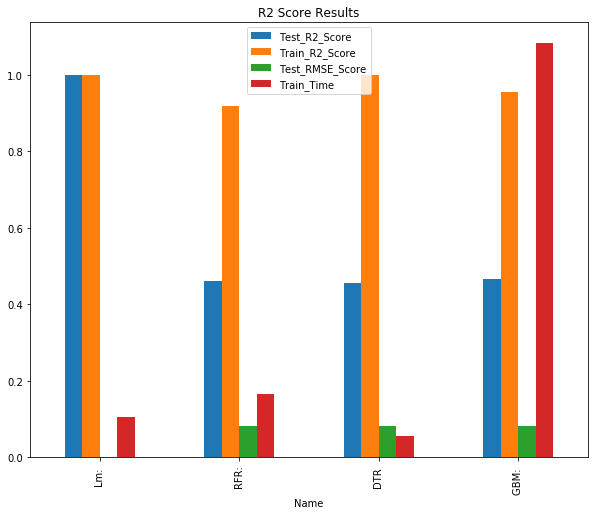

In [444]:
gf.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score','Train_Time'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

__It shows that train time is highest for GBM while lowest for DTR__<br>
__Test R2 score of Lm is highest while all other have same r2 score__<br>
__Train R2 score of DTR is highest while lowest for RFR and GBM__


__Here we are using RANDOM FOREST ELIMINATOR to find best features__

In [447]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\61478\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [448]:

print('Chosen best 5 feature by rfe:',t.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['First Quartile Sales Price\n$'000s', 'Median Sales Price\n$'000s',
       'Third Quartile Sales Price\n'000s', 'Mean Sales Price\n$'000s',
       'Qtly change in Median'],
      dtype='object')


__It shows that First quartile ,median sales,third quartile ,mean sales,Qtl change in median is best feature out of other feature__